In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [19]:

fw_df= pd.read_csv("player_TopRate_position_JJINMAK/FW_combined.csv")

# fw_df = pd.concat([fw_df, fw_df_v])

In [20]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(dataframe):
    """
    주어진 데이터프레임의 VIF(분산 팽창 계수)를 계산.

    Args:
        dataframe (pd.DataFrame): 독립 변수들로 이루어진 데이터프레임.

    Returns:
        pd.DataFrame: 변수 이름과 해당 VIF 값.
    """
    # 상수항 추가 (회귀식의 절편을 고려하기 위함)
    X = add_constant(dataframe)
    
    # VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

fw_df_drop = fw_df.copy()
fw_df_drop = fw_df_drop.drop(columns= ['선수', "포지션_DF", "포지션_FW", "포지션_GK", "평점","포지션_MF", "isWin"])
# 예시 데이터
# df: 독립 변수들로 이루어진 데이터프레임
vif_result = calculate_vif(fw_df_drop)
vif_result = vif_result[vif_result['VIF'] < 7].reset_index(drop=True)
# VIF 결과 출력
# 내림차순 정렬
sorted_vif_result = sorted(vif_result, key=lambda x: x[1], reverse=True)

# 결과 출력
print(vif_result)
feature_list = vif_result['Feature'].tolist()


/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


         Feature       VIF
0           출전시간  1.518980
1             득점  1.798914
2             도움  1.424338
3          오프사이드  1.045536
4            프리킥  1.252038
5            코너킥  1.448855
6            스로인  2.901072
7         Ishome  1.050335
8       경합(지상)성공  2.344617
9   경합(지상)성공률(%)  1.606388
10      경합(공중)성공  2.179757
11  경합(공중)성공률(%)  1.378271
12          태클성공  2.503532
13      태클성공률(%)  2.440732
14          클리어링  1.915617
15          인터셉트  1.418585
16            차단  1.944955
17            획득  1.701622
18            블락  1.381328
19           볼미스  1.049086
20            파울  1.219998
21           피파울  1.123708
22            경고  1.190990
23            퇴장  1.033892
24           키패스  2.246199
25      공격진영패스성공  4.519425
26  공격진영패스성공률(%)  1.468902
27      수비진영패스성공  2.728649
28  수비진영패스성공률(%)  2.323738
29     롱패스성공률(%)  2.050278
30   중거리패스성공률(%)  3.009840
31     숏패스성공률(%)  2.234688
32    전진패스성공률(%)  5.511085
33     횡패스성공률(%)  2.014914
34     백패스성공률(%)  1.154170
35         크로스성공  3.606583
3

In [21]:
columns = ["isWin", "선수","포지션_DF", "포지션_FW", "포지션_GK", "포지션_MF"]
X = fw_df[feature_list]  # 피처 데이터
y = fw_df['isWin']
# 데이터 나누기

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 모델 정의
logreg = LogisticRegression(max_iter=1000, random_state=42)

# RFE 객체 생성 (변수 5개 선택 예시)
rfe = RFE(estimator=logreg, n_features_to_select=10)

# RFE를 사용한 학습
rfe.fit(X, y)

# 선택된 변수 확인
selected_features = X.columns[rfe.support_]
print("선택된 변수:", selected_features)

/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/5jun99/.pyenv/versions/3.8.19/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

선택된 변수: Index(['득점', '도움', '오프사이드', 'Ishome', '태클성공', '클리어링', '볼미스', '경고', '퇴장',
       '키패스'],
      dtype='object')


In [12]:
X = X[selected_features]
X.shape

(1580, 10)

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

# 모델 초기화 및 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7056962025316456

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74       152
           1       0.83      0.54      0.66       164

    accuracy                           0.71       316
   macro avg       0.74      0.71      0.70       316
weighted avg       0.74      0.71      0.70       316



In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# 변수 선택 후 데이터셋 재구성
X_selected = X[selected_features]

# 나이브 베이즈 모델 학습 및 교차 검증
nb_model = GaussianNB()
scores = cross_val_score(nb_model, X_selected, y, cv=5)
print("RFE 후 나이브 베이즈 교차 검증 정확도:", scores.mean())

RFE 후 나이브 베이즈 교차 검증 정확도: 0.6037974683544303


교차 검증 정확도: 0.6108 ± 0.0161


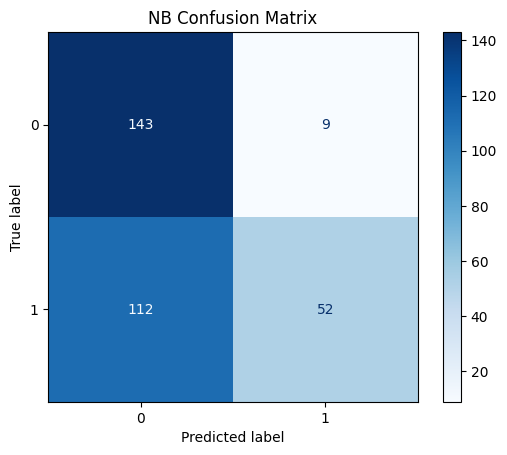

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
# 교차 검증: 5-fold 교차 검증으로 정확도 평가
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"교차 검증 정확도: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 혼돈 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼돈 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"NB Confusion Matrix")
plt.show()

print("="*50)